<a href="https://colab.research.google.com/github/vkk1710/SOS---Leaf-Localization/blob/main/leaf_localisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
from tqdm import tqdm
import cv2
import os
import zipfile
import shutil

In [ ]:
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
import keras

Using TensorFlow backend.


In [ ]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
zip_ref = zipfile.ZipFile('/content/fin_tom_data.zip', 'r')
zip_ref.extractall("/content")
zip_ref.close()
os.remove('/content/fin_tom_data/annotations/test/classes.txt')
shutil.move('/content/fin_tom_data/annotations/train/classes.txt','/content/classes.txt')

In [ ]:
len(os.listdir('/content/drive/My Drive/fin_tom_data/annotations/test'))
#os.remove('/content/drive/My Drive/fin_tom_data/annotations/test/classes.txt')
#shutil.move('/content/drive/My Drive/fin_tom_data/annotations/train/classes.txt','/content/classes.txt')

552

In [ ]:
train_img = '/content/drive/My Drive/fin_tom_data/train'
test_img = '/content/drive/My Drive/fin_tom_data/test'
train_anno = '/content/drive/My Drive/fin_tom_data/annotations/train'
test_anno = '/content/drive/My Drive/fin_tom_data/annotations/test'

In [ ]:
def resize(dire,inp_shape):
  for i in tqdm(os.listdir(dire)):
    img = cv2.imread(os.path.join(dire,i))
    img = cv2.resize(img,inp_shape,interpolation = cv2.INTER_CUBIC)
    cv2.imwrite(os.path.join(dire,i),img)

In [ ]:
def hor_flip_box(dire):
  for i in tqdm(os.listdir(dire)):
    k=[]
    file = open(os.path.join(dire,i),'r')
    file1 = open(os.path.join(dire,'lr__'+i),'w')    ##.split('.')[0]+'_lr'+'.txt'
    s = file.readlines()
    #print(i)
    #print('s:',s)
    k = s[0].split(' ') 
    #print('k:',k)
    k[1] = str(round(1-float(k[1]),6))
    file1.write(' '.join(k)) 
    file.close()
    file1.close()
def hor_flip(dire):
  for i in tqdm(os.listdir(dire)):
    img = cv2.imread(os.path.join(dire,i))
    imgc = cv2.flip(img,1) 
    cv2.imwrite(os.path.join(dire,'lr__'+i),imgc)

In [ ]:
def ver_flip_box(dire):
  for i in tqdm(os.listdir(dire)):
    k=[]
    file = open(os.path.join(dire,i),'r')
    file1 = open(os.path.join(dire,'ud__'+i),'w')    ##.split('.')[0]+'_ud'+'.txt'
    s = file.readlines()
    #print(i)
    #print('s:',s)
    k = s[0].split(' ') 
    #print('k:',k)
    k[2] = str(round(1-float(k[2]),6))
    file1.write(' '.join(k)) 
    file.close()
    file1.close()
def ver_flip(dire):
  for i in tqdm(os.listdir(dire)):
    img = cv2.imread(os.path.join(dire,i))
    imgc = cv2.flip(img,0) 
    cv2.imwrite(os.path.join(dire,'ud__'+i),imgc)

In [ ]:
ver_flip(train_img)
ver_flip_box(train_anno)
ver_flip(test_img)
ver_flip_box(test_anno)

100%|██████████| 138/138 [01:12<00:00,  1.90it/s]


In [ ]:
hor_flip(train_img)
hor_flip_box(train_anno)
hor_flip(test_img)
hor_flip_box(test_anno)

100%|██████████| 276/276 [00:03<00:00, 89.83it/s]


In [ ]:
os.listdir(test_img)

In [ ]:
resize(train_img,(224,224))
resize(test_img,(224,224))

In [ ]:
anntr = sorted(os.listdir(train_anno))
imgtr = sorted(os.listdir(train_img))
annte = sorted(os.listdir(test_anno))
imgte = sorted(os.listdir(test_img))

In [ ]:
X_tr = []
X_te = []
y_tr_cl = []
y_tr_bx = []
y_te_cl = []
y_te_bx = []
for i in tqdm(imgtr):
   X_tr.append(cv2.imread(os.path.join(train_img,i)))
for i in tqdm(imgte):
   X_te.append(cv2.imread(os.path.join(test_img,i)))
for i in tqdm(anntr):
  k=[]
  file = open(os.path.join(train_anno,i),'r')   
  s = file.read().splitlines()
  k = list(map(lambda x:float(x),s[0].split(' ')))
  y_tr_cl.append(k[0:1])
  y_tr_bx.append(k[1:])
  file.close()
for i in tqdm(annte):
  k=[]
  file = open(os.path.join(test_anno,i),'r')   
  s = file.read().splitlines()
  k = list(map(lambda x:float(x),s[0].split(' ')))
  y_te_cl.append(k[0:1])
  y_te_bx.append(k[1:])
  file.close()  


100%|██████████| 2160/2160 [15:46<00:00,  2.28it/s]

100%|██████████| 552/552 [04:02<00:00,  2.28it/s]

 89%|████████▉ | 1917/2160 [10:09<00:54,  4.45it/s]

In [ ]:
x_tr = np.array(X_tr)
x_te = np.array(X_te)
x_tr = x_tr/255.0
x_te = x_te/255.0
y_tr_cl = np.array(y_tr_cl)
y_tr_bx = np.array(y_tr_bx)
y_te_cl = np.array(y_te_cl)
y_te_bx = np.array(y_te_bx)

In [ ]:
model = 

In [ ]:
model = VGG19(include_top=False,weights='',input_shape=(224,224,3))
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model = VGG16(classes=4,weights=None,input_shape=(224,224,3),include_top=False)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.outputs[0]

<tf.Tensor 'block5_pool/MaxPool:0' shape=(None, 7, 7, 512) dtype=float32>

In [ ]:
flat1 = Flatten()(model.outputs[0])
dense1 = Dense(4096, activation='relu')(flat1)
dense2 = Dense(4096, activation='relu')(dense1)
class_out = Dense(2,activation='softmax',name="class_output")(dense2)
box_out = Dense(4,name="box_output",activation='linear')(dense2)
model = Model(inputs=model.inputs, outputs=[class_out,box_out])

NameError: ignored

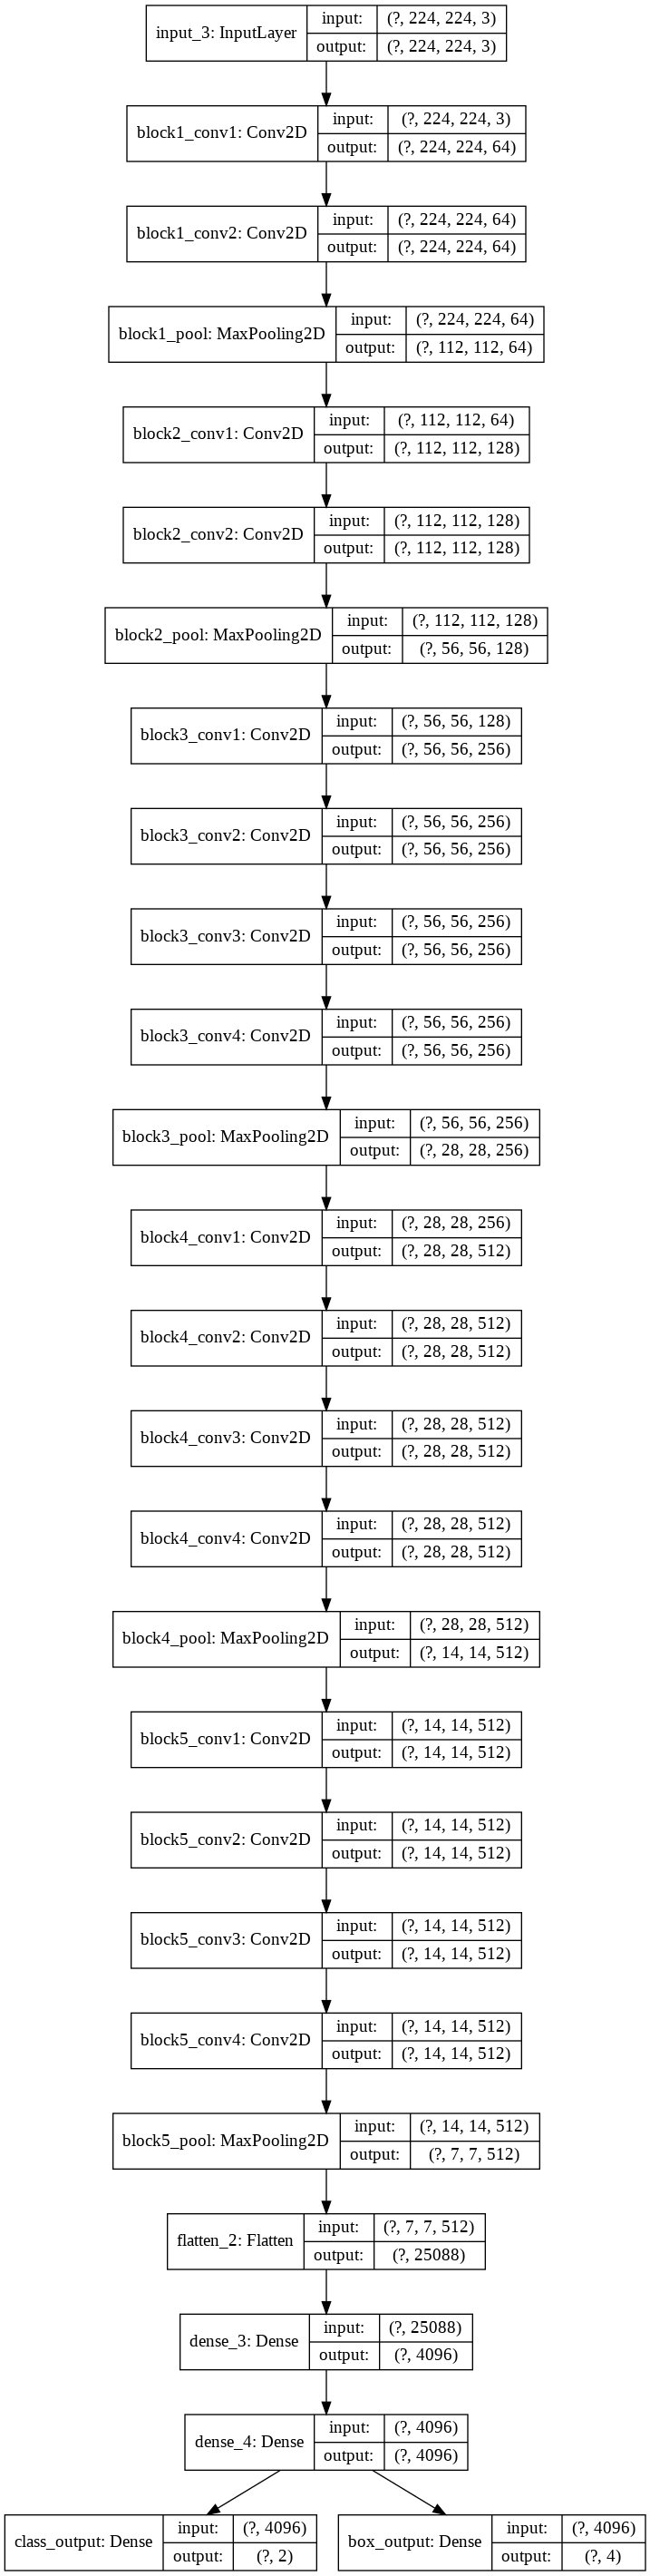

In [ ]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
model.compile(
    optimizer= keras.optimizers.RMSprop(1e-3),
    loss={
        "box_output": keras.losses.MeanSquaredError(),
        "class_output": keras.losses.SparseCategoricalCrossentropy(),
    },
    metrics={
        "box_output": [
            keras.metrics.MeanAbsoluteError()
        ],
        "class_output": [keras.metrics.CategoricalAccuracy()],
    },
)

In [ ]:
history = model.fit(x_tr, [y_tr_cl,y_tr_bx], batch_size=16, epochs=2,validation_data=(x_te, [y_te_cl,y_te_bx]))

Train on 2160 samples, validate on 552 samples
Epoch 1/2
2160/2160 [==============================] - 86s 40ms/step - loss: 0.9680 - class_output_loss: 0.7317 - box_output_loss: 0.2363 - class_output_categorical_accuracy: 0.5005 - box_output_mean_absolute_error: 0.3660 - val_loss: 0.8446 - val_class_output_loss: 0.6960 - val_box_output_loss: 0.1504 - val_class_output_categorical_accuracy: 0.0000e+00 - val_box_output_mean_absolute_error: 0.3393
Epoch 2/2
2160/2160 [==============================] - 86s 40ms/step - loss: 2.5573 - class_output_loss: 0.7035 - box_output_loss: 1.8537 - class_output_categorical_accuracy: 0.6444 - box_output_mean_absolute_error: 0.4542 - val_loss: 0.8414 - val_class_output_loss: 0.6937 - val_box_output_loss: 0.1476 - val_class_output_categorical_accuracy: 1.0000 - val_box_output_mean_absolute_error: 0.3346


In [ ]:
history.history['loss']

[0.9680417294855471, 2.5572837529359043]

In [ ]:
history.history['val_loss']

[0.8445648196814717, 0.8413755928260692]

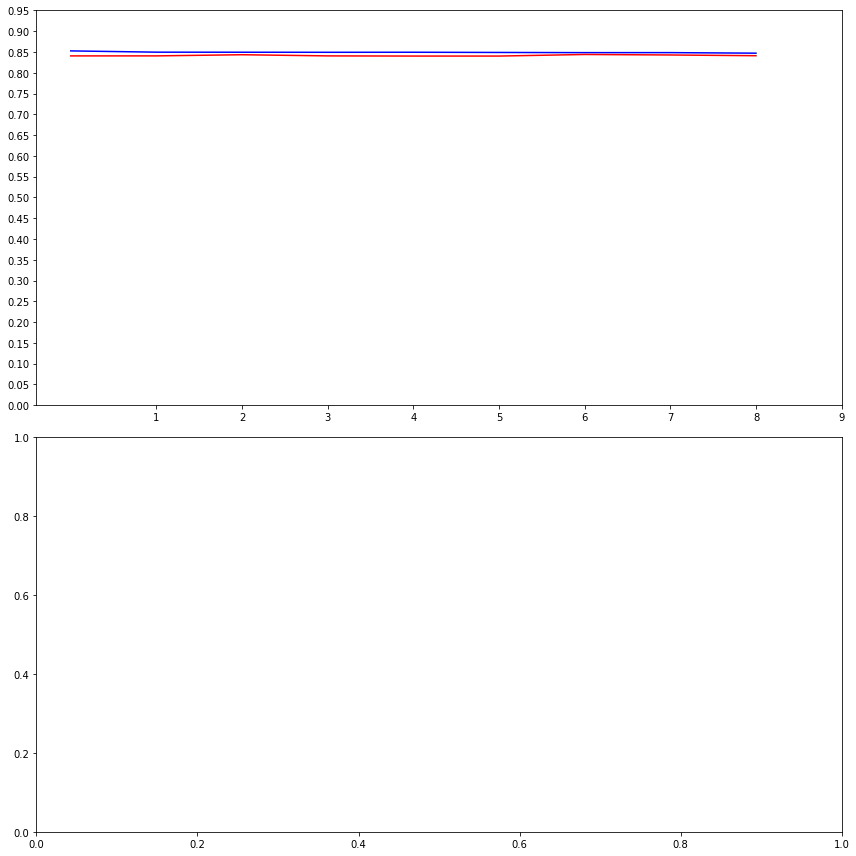

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'][1:], color='b', label="Training loss")
ax1.plot(history.history['val_loss'][1:], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 10, 1))
ax1.set_yticks(np.arange(0, 1, 0.05))
 
#ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
#ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
#ax2.set_xticks(np.arange(1, 15, 1))
 
#legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
model.save_weights("/content/vgg19modelweights.h5")

# **testing**

In [ ]:
model.load_weights("/content/vgg19modelweights.h5")

In [ ]:
shutil.move('/content/vgg19modelweights.h5','/content/drive/My Drive/fin_tom_data')

'/content/drive/My Drive/fin_tom_data/vgg19modelweights.h5'

In [ ]:
img = cv2.imread('/content/Bs39.JPG')
imgc = img.copy()
cv2.imwrite('/content/imgc.jpg',imgc)

True

In [ ]:
#os.mkdir('/content/testimg')
shutil.move('/content/Bs39.JPG','/content/testimg/Bs39.JPG')

'/content/testimg/Bs39.JPG'

In [ ]:
os.remove('/content/testimg/FS547-4-big_1.jpg')

In [ ]:
os.listdir('/content/testimg')

[]

In [ ]:
resize('/content/testimg',(224,224))
xtest=[]
for i in tqdm(os.listdir('/content/testimg')):
  img = cv2.imread(os.path.join('/content/testimg',i))
  xtest.append(img)
xtest = np.array(xtest)/255.0

100%|██████████| 1/1 [00:00<00:00, 591.58it/s]


In [ ]:
 ypr = model.predict(xtest,batch_size=1)

In [ ]:
ypr

[array([[0.5248355 , 0.47516444]], dtype=float32),
 array([[0.4869778 , 0.49431074, 0.3725826 , 0.36857793]], dtype=float32)]

In [ ]:
ypr

[array([[0.5248355 , 0.47516444]], dtype=float32),
 array([[0.4869778 , 0.49431074, 0.3725826 , 0.36857793]], dtype=float32)]

In [ ]:
y_tr_bx

array([[0.475352, 0.500921, 0.880282, 0.979742],
       [0.431641, 0.5     , 0.839844, 0.960938],
       [0.480392, 0.5     , 0.921569, 0.852761],
       ...,
       [0.523753, 0.428994, 0.786223, 0.775148],
       [0.519174, 0.460836, 0.896755, 0.796345],
       [0.505639, 0.503667, 0.815789, 0.948655]])

(227, 227, 3)


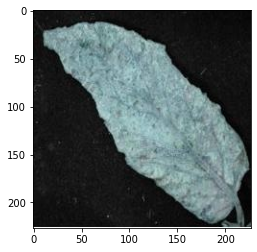

In [ ]:
import matplotlib.pyplot as plt
img = cv2.imread('/content/imgc.jpg')
plt.imshow(img)
print(img.shape)

In [ ]:
l = ypr[1][0]
l

array([0.7473583 , 0.7174667 , 0.60703474, 0.6353267 ], dtype=float32)

In [ ]:
l = ypr[1][0]
l

array([0.4869778 , 0.49431074, 0.3725826 , 0.36857793], dtype=float32)

In [ ]:
x1 = int(round((l[0]-l[2]/2)*img.shape[1]))
x2 = int(round((l[0]+l[2]/2)*img.shape[1]))
y1 = int(round((l[1]-l[3]/2)*img.shape[0]))
y2 = int(round((l[1]+l[3]/2)*img.shape[0]))

In [ ]:
x2

239

In [ ]:
cv2.rectangle(img,(x1,y1),(x2,y2),(256,256,256),1)

array([[[ 13,  13,  13],
        [ 14,  14,  14],
        [ 17,  17,  17],
        ...,
        [  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7]],

       [[ 15,  15,  15],
        [ 16,  16,  16],
        [ 18,  18,  18],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  6,   6,   6]],

       [[ 16,  16,  16],
        [ 16,  16,  16],
        [ 17,  17,  17],
        ...,
        [  7,   7,   7],
        [  7,   7,   7],
        [  7,   7,   7]],

       ...,

       [[ 14,  14,  14],
        [ 11,  11,  11],
        [ 12,  12,  12],
        ...,
        [ 83,  91,  91],
        [ 71,  79,  79],
        [ 62,  70,  70]],

       [[ 24,  24,  24],
        [ 21,  21,  21],
        [ 22,  22,  22],
        ...,
        [ 67,  75,  75],
        [ 59,  67,  67],
        [ 53,  61,  61]],

       [[253, 253, 253],
        [251, 251, 251],
        [251, 251, 251],
        ...,
        [248, 255, 255],
        [247, 255, 255],
        [245, 253, 253]]

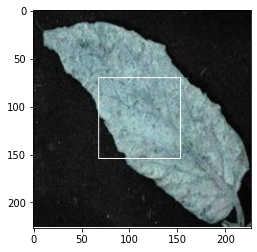

In [ ]:
plt.imshow(img)